# Đồ Án Lập Trình cho Khoa Học Dữ Liệu

## Thành viên
| Mã số sinh viên | Học và tên                                           |
|:---------------:|:-----------------------------------------------------|
|18120225         | [Trần Thanh Phúc](https://github.com/PhucThanh)      |
|18120221         | [Nguyễn Điền Thanh Phong](https://github.com/sgrayk) |

---

## Môi trường code

In [1]:
!which python 

/home/phuc/anaconda3/envs/p4ds-env/bin/python


---

## Các thư viện sử dụng

*Nhóm có sử dụng thư viện đồ họa seaborn để viện trực quan hóa dữ liệu đẹp hơn*

In [2]:
# Cài đặt thêm thư viện seaborn
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter
import datetime
import re

---

## Thu thập dữ liệu

TV Shows and Movies listed on Netflix

Dataset này bao gồm tv shows và movies khả dụng trên Netflix của năm 2019. Tập dữ liệu được thu thập từ Flixable, một công cụ tìm kiếm Netflix của bên thứ ba.

Vào năm 2018, họ đã phát hành một báo cáo thú vị cho thấy số lượng chương trình truyền hình trên Netflix đã tăng gần gấp ba lần kể từ năm 2010. Số lượng phim của dịch vụ phát trực tuyến đã giảm hơn 2.000 tựa kể từ năm 2010, trong khi số lượng chương trình truyền hình của nó tăng gần gấp ba lần. Sẽ rất thú vị khi khám phá xem tất cả những thông tin chi tiết khác có thể thu được từ cùng một tập dữ liệu.

**Bản quyền**

Dữ liệu có bản quyền `CC0 1.0 Universal`:

> Bạn có thể sao chép, sửa đổi, phân phối và thực hiện công việc, ngay cả với mục đích thương mại, tất cả mà không cần xin phép


---

# Khám phá dữ liệu và tiền xử lý

In [4]:
df_movies=pd.read_csv("./netflix_titles.csv")
df_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [5]:
n_rows,n_cols=df_movies.shape
print(f'Dữ liệu có {n_rows} dòng và {n_cols} cột.')

Dữ liệu có 7787 dòng và 12 cột.


Mỗi dòng là một bộ phim hoặc TV Show đã chiếu trên Netflix. Không có vấn đề mỗi dòng có ý nghĩa khác nhau.

## Kiểm tra lặp dữ liệu

In [6]:
assert(len(df_movies['show_id'].unique())==n_rows)

Ta thấy mỗi phim có một `show_id` khác nhau và số id khác nhau cũng bằng với số dòng nên không có trường hợp lặp dữ liệu.

## Ý nghĩa mỗi cột trong Dữ liệu

- **show_id**: các giá trị đơn lập giúp xác định một Chương trình.
- **type**: loại chương trình của Netflix, là Movie hoặc TV Show.
- **title**: tên chương trình được phát trên Netflix.
- **director**: danh sách các đạo diễn chương trình
- **cast**: danh sách các diễn viên trong Chương trình, ngăn cách bởi dấu ","
- **country**: danh sách tên các nước sản xuất 
- **date_added**: thời gian được thêm vào Netflix
- **release_year**: năm sản xuất chương trình
- **rating**: đánh giá phim thuộc thể loại nào và mức độ của nó
- **duration**: thời lượng chương trình, có thể kéo dài trong hơn một mùa,...
- **listed_in**: danh sách thể loại chương trình
- **description**: mô tả chương trình

## Kiểm tra loại dữ liệu của mỗi cột có đơn nhất không?

In [7]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
def open_object_dtype(s):
    
    dtypes = set(s.apply(type))
    
    return dtypes

for col in df_movies.columns:
    print("Column %12s có kiểu dữ liệu: %s" % (col, open_object_dtype(df_movies[col])))

Column      show_id có kiểu dữ liệu: {<class 'str'>}
Column         type có kiểu dữ liệu: {<class 'str'>}
Column        title có kiểu dữ liệu: {<class 'str'>}
Column     director có kiểu dữ liệu: {<class 'str'>, <class 'float'>}
Column         cast có kiểu dữ liệu: {<class 'str'>, <class 'float'>}
Column      country có kiểu dữ liệu: {<class 'str'>, <class 'float'>}
Column   date_added có kiểu dữ liệu: {<class 'str'>, <class 'float'>}
Column release_year có kiểu dữ liệu: {<class 'int'>}
Column       rating có kiểu dữ liệu: {<class 'str'>, <class 'float'>}
Column     duration có kiểu dữ liệu: {<class 'str'>}
Column    listed_in có kiểu dữ liệu: {<class 'str'>}
Column  description có kiểu dữ liệu: {<class 'str'>}


**Vấn đề cần tiền xử lý:**
Theo thông tin ta nhận được ở trên, ta có những đánh giá sau: 
- Cột `date_added` đang có dtype là `str` và `float`. Để đúng về ý nghĩa, ta sẽ thực hiện bước tiền xử lý là chuyển sang dạng `datetime`.
- Cột `country` và `rating` có dtype gồm 2 loại là `str` và `float`, ta sẽ tiền xử lý để thống nhất `dtype` là `str` 
- Cột `director`, `cast` có dtype gồm 2 loại là `str` và `float`, ta sẽ tiền xử lý để thống nhất `dtype` là `str` rồi sau đó chuyển thành danh sách `numpy.array`.
- Cột `listed_in` có dtype là `str` nhưng bản thân nó là một danh sách, do đó, ta sẽ cần đưa nó về `numpy.aray`
- Cột `duration` có dtype là `str` nhưng bản thân nó bao gồm cả giá trị độ lớn và đơn vị, do đó ta cũng cần xử lý nó về 2 cột riêng.
- Hầu hết các cột có giá trị `float` là vì các cột có giá trị `nan`

## Xử lý cột Title 

Việc tách tên phim bằng dấu : có thể hữu ích trong việc tìm các phim liên quan. Chẳng hạn dòng phim Transformers thường có tên phim là `Transformer:<tên của tập phim>`. Bằng cách tách được tên phim như vậy chúng ta có thể recommend các tập khác nhau của một phim.

In [9]:
df_movies['title_postfix']=df_movies['title'].apply(lambda x:x[x.find(":")+1:] if x.find(":")>=0 else np.nan)

In [10]:
df_movies['title_prefix']=df_movies['title'].apply(lambda x:x[:x.find(":")] if x.find(":")>=0 else x)

In [11]:
df_movies.title_prefix.value_counts()[df_movies.title_prefix.value_counts()>4]

NOVA                              19
Monster High                      13
True                              10
Trailer Park Boys                  9
Kevin Hart                         8
ReMastered                         8
Krish Trish and Baltiboy           8
Jeff Dunham                        7
Dragons                            6
Star Trek                          5
Bill Burr                          5
Super Monsters                     5
Barbie                             5
Jim Gaffigan                       5
My Little Pony Equestria Girls     5
Bill Hicks                         5
Iliza Shlesinger                   5
Transformers                       5
Little Singham                     5
Katt Williams                      5
Name: title_prefix, dtype: int64

## Xử lý cột đạo diễn
Phim có nhiều đạo diễn sẽ được ngăn bởi dấu ,

In [12]:
#df_movies['director'].fillna("Unknow",inplace=True)

In [13]:
df_movies['director']=df_movies['director'].apply(lambda x:str(x).split(", "))

In [14]:
df_movies['director'].sample(6)

943        [Supavitra Babul]
5128                   [nan]
427             [Mike Doyle]
978       [Clovis Cornillac]
2591          [Akram Farouk]
430     [Antoinette Jadaone]
Name: director, dtype: object

Những phim không có đạo diễn sẽ là list nan: [nan]. Ta sẽ thay thế nó bằng list rỗng.

In [15]:
df_movies['director']=df_movies['director'].apply(lambda x:[] if str(x)=="['nan']" else x)
df_movies['director'].sample(6)

2713    [Raymie Muzquiz, Stu Livingston]
990         [Miguel Cohan, Miguel Cohan]
6798                                  []
7669                                  []
6742                       [John Duigan]
2066                      [Selima Taibi]
Name: director, dtype: object

## Xử lý cột cast thành mảng diễn viên

In [16]:
df_movies['cast'].head()

0    João Miguel, Bianca Comparato, Michel Gomes, R...
1    Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2    Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3    Elijah Wood, John C. Reilly, Jennifer Connelly...
4    Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
Name: cast, dtype: object

Ta để ý tên diễn viên được cách nhau bởi `,_` (có khoảng trắng phía sau dấu ,)

In [17]:
df_movies['cast_array']=df_movies['cast'].apply(lambda x:str(x).split(", "))
#Fix nan thành mảng rỗng
df_movies['cast_array']=df_movies['cast_array'].apply(lambda x:[] if str(x)=="['nan']" else x)
df_movies['cast_array'].head()

0    [João Miguel, Bianca Comparato, Michel Gomes, ...
1    [Demián Bichir, Héctor Bonilla, Oscar Serrano,...
2    [Tedd Chan, Stella Chung, Henley Hii, Lawrence...
3    [Elijah Wood, John C. Reilly, Jennifer Connell...
4    [Jim Sturgess, Kevin Spacey, Kate Bosworth, Aa...
Name: cast_array, dtype: object

## Xử lý cột duration
Cột duration có 2 đơn vị là season hoặc min. Giả thiết đưa ra là những dòng có đơn vị là season là TV show, đơn vị min là phim lẻ. Ta sẽ kiểm tra điều này bằng cách đếm giá trị như sau.

In [18]:
#Số lượng Movie và TV Show
df_movies['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [19]:
#Số lượng dòng với duration có chữ min:
df_movies['duration'].apply(lambda x:x.find("min")>=0).sum()

5377

Đều là 5377 nên giả thiết của chúng ta là đúng. Chúng ta sẽ tách cột duration thành `season` thể hiện số season và `min` thể hiện số phút của phim. Mục đích điều này có thể giúp ta xử lý dễ dàng hơn các thao tác như sort theo season, min trong tương lai.

In [20]:
df_movies['min']=df_movies['duration'][df_movies['duration'].apply(lambda x:x.find("min")>=0)]
df_movies['season']=df_movies['duration'][df_movies['duration'].apply(lambda x:x.find("Season")>=0)]

Ta cũng sẽ xóa chữ min và season(s) trên 2 cột ta mới tạo.

In [21]:
df_movies['min']=df_movies['min'].apply(lambda x:x[:-4] if pd.notnull(x) else np.nan)
df_movies['season']=df_movies['season'].apply(lambda x:x.replace('Seasons','').replace('Season','') if pd.notnull(x) else np.nan)

In [22]:
# Đổi kiểu dữ liệu thành số
#Float vì không bị lỗi khi chuyển NaN
df_movies['min']=df_movies['min'].astype('float') 
df_movies['season']=df_movies['season'].astype('float')

## Xử lý listed_in

Đầu tiên ta phải thông kê có tất cả bao nhiêu thể loại phim

In [23]:
# Chuyển listed_in thành mảng
df_movies['listed_in_array']=df_movies['listed_in'].apply(lambda x:str(x).split(", "))
df_movies['listed_in_array'].head()

0    [International TV Shows, TV Dramas, TV Sci-Fi ...
1                       [Dramas, International Movies]
2                [Horror Movies, International Movies]
3    [Action & Adventure, Independent Movies, Sci-F...
4                                             [Dramas]
Name: listed_in_array, dtype: object

Để kiểm tra các giá trị có thể có, ta cộng tất cả các mảng trên lại và lấy giá trị unique:

In [24]:
listed_unique=np.unique(df_movies['listed_in_array'].sum())
listed_unique

array(['Action & Adventure', 'Anime Features', 'Anime Series',
       'British TV Shows', 'Children & Family Movies',
       'Classic & Cult TV', 'Classic Movies', 'Comedies',
       'Crime TV Shows', 'Cult Movies', 'Documentaries', 'Docuseries',
       'Dramas', 'Faith & Spirituality', 'Horror Movies',
       'Independent Movies', 'International Movies',
       'International TV Shows', "Kids' TV", 'Korean TV Shows',
       'LGBTQ Movies', 'Movies', 'Music & Musicals', 'Reality TV',
       'Romantic Movies', 'Romantic TV Shows', 'Sci-Fi & Fantasy',
       'Science & Nature TV', 'Spanish-Language TV Shows',
       'Sports Movies', 'Stand-Up Comedy', 'Stand-Up Comedy & Talk Shows',
       'TV Action & Adventure', 'TV Comedies', 'TV Dramas', 'TV Horror',
       'TV Mysteries', 'TV Sci-Fi & Fantasy', 'TV Shows', 'TV Thrillers',
       'Teen TV Shows', 'Thrillers'], dtype='<U28')

Có vẻ như nhiều thể loại phim chỉ khác nhau do có chữ TV phía trước: chẳng hạn như `Dramas` và `TV Dramas`. Ta đã có cột `type` cho biết loại phim rồi nên để thêm TV vào đây sẽ dư thừa. Chúng ta sẽ gộp các thể loại có chữ TV vào loại không có TV tương ứng (`TV Dramas` thành `Dramas`). Tuy nhiên trước khi làm điều này ta phải kiểm tra bảo đảm giả thiết chúng ta đưa ra là phù hợp. Cụ thể ta sẽ kiểm tra: 
* Có phải toàn bộ `TV Show` đều có chữ TV trong `list_in` không. Lưu ý là list_in chứa nhiều thể loại nên ta cần phải kiểm tra toàn bộ.

Mục đích của việc làm trên có thể giúp ích cho hệ thống recommendation sau này. Khi một người coi thể loại Thrillers thì chúng ta có thể không cần quan tâm Thrillers đó là movie hay là TV show.

### Loại bỏ từ TV khỏi một số thể loại

In [25]:
TV_show_count=len(df_movies[df_movies['type']=='TV Show'])
print(f'Có {TV_show_count} TV show.')

Có 2410 TV show.


In [26]:
#Ta tạo thêm m là lọc ra các dòng chỉ chứa TV show
m=df_movies[df_movies['type']=='TV Show']

In [27]:
#Số lượng phim có thể loại chứa chữ TV trong toàn bộ bảng
s1=sum(df_movies['listed_in_array'].apply(lambda l:any(x.find("TV")>=0 for x in l)))
print(f'Có tổng cộng {s1} dòng có chứa ít nhất 1 chữ TV trong listed_in')

Có tổng cộng 2319 dòng có chứa ít nhất 1 chữ TV trong listed_in


In [28]:
#Số lượng phim có thể loại chứa chữ TV trong các TV Show
s2=sum(m['listed_in_array'].apply(lambda l:any(x.find("TV")>=0 for x in l)))
print(f'Trong số các TV show, có tổng cộng {s2} dòng có chứa ít nhất 1 chữ TV trong listed_in')

Trong số các TV show, có tổng cộng 2319 dòng có chứa ít nhất 1 chữ TV trong listed_in


Ta tính 2 lần như trên để đảm bảo rằng không có phim nào (Không phải TV Show) mà có chứa chữ TV trong thể loại. Trong số 2410 TV show có 2319 show có thể loại chứa chữ TV trong đó. Như vậy ta có thể an toàn xóa đi các chữ TV trong `listed_in_array`. Sau khi xóa xong chung ta vẫn biết phim đó có phải là TV show hay không nhờ vào cột `type`.

Tuy nhiên cần lưu ý một vài thể loại sẽ không có dạng không có chữ `TV` tương ứng. Ví dụ `Reality TV` sẽ không có thể loại `Reality` tương ứng.

Ta sẽ tạo ra một dict có dạng sau:
```
{
    'TV Dramas':'Dramas',
    'TV Action & Adventure':'Action & Adventure',
    ...
}
```

In [29]:
#Tạo ra array chứa thể loại có chữ TV
TV_listed=[a for a in listed_unique if a.find("TV")>=0]

#Array chứa thể loại có chữ TV sau khi xóa TV
TV_listed_remove=[a.replace("TV ","").replace("TV","") for a in TV_listed]

#Array chứa thể loại không có chữ TV
TV_listed_noTV=[a for a in listed_unique if a.find("TV")==-1]

#Danh sách các từ có thể thay thế
to_replace_list=list(set(TV_listed_remove).intersection(TV_listed_noTV))
to_replace_list

['Thrillers', 'Comedies', 'Sci-Fi & Fantasy', 'Action & Adventure', 'Dramas']

In [30]:
#Các từ ở trên nằm tại các vị trí sau:
id_to_replace=[item[0] for item in enumerate(TV_listed_remove) if item[1] in to_replace_list]
id_to_replace

[10, 11, 12, 15, 17]

In [31]:
#Các từ cần thay thế
to_replace=[TV_listed[i] for i in id_to_replace]
to_replace

['TV Action & Adventure',
 'TV Comedies',
 'TV Dramas',
 'TV Sci-Fi & Fantasy',
 'TV Thrillers']

In [32]:
#Tạo dict map từ cần thay thế và từ thay thế
replace_dict=dict((el,el.replace("TV ","")) for el in to_replace)
replace_dict

{'TV Action & Adventure': 'Action & Adventure',
 'TV Comedies': 'Comedies',
 'TV Dramas': 'Dramas',
 'TV Sci-Fi & Fantasy': 'Sci-Fi & Fantasy',
 'TV Thrillers': 'Thrillers'}

In [33]:
#Tiến hành thay thế
df_movies['listed_in_array']=df_movies['listed_in_array'].apply(lambda x:[replace_dict.get(i,i) for i in x])

In [34]:
#Kiểm tra lại kết quả
listed_unique=np.unique(df_movies['listed_in_array'].sum())
listed_unique

array(['Action & Adventure', 'Anime Features', 'Anime Series',
       'British TV Shows', 'Children & Family Movies',
       'Classic & Cult TV', 'Classic Movies', 'Comedies',
       'Crime TV Shows', 'Cult Movies', 'Documentaries', 'Docuseries',
       'Dramas', 'Faith & Spirituality', 'Horror Movies',
       'Independent Movies', 'International Movies',
       'International TV Shows', "Kids' TV", 'Korean TV Shows',
       'LGBTQ Movies', 'Movies', 'Music & Musicals', 'Reality TV',
       'Romantic Movies', 'Romantic TV Shows', 'Sci-Fi & Fantasy',
       'Science & Nature TV', 'Spanish-Language TV Shows',
       'Sports Movies', 'Stand-Up Comedy', 'Stand-Up Comedy & Talk Shows',
       'TV Horror', 'TV Mysteries', 'TV Shows', 'Teen TV Shows',
       'Thrillers'], dtype='<U28')

## Xử lý Country
Cột country cũng cần xử lý đưa về mảng.

In [35]:
df_movies['country'].value_counts()

United States                                     2555
India                                              923
United Kingdom                                     397
Japan                                              226
South Korea                                        183
                                                  ... 
United Kingdom, Germany, Canada, United States       1
Turkey, South Korea                                  1
France, Germany, Czech Republic, Belgium             1
Canada, Hungary, United States                       1
Ireland, Luxembourg, Belgium                         1
Name: country, Length: 681, dtype: int64

In [36]:
df_movies['country']=df_movies['country'].apply(lambda x:re.split(', |,',str(x)))
#Fix nan thành mảng rỗng
df_movies['country']=df_movies['country'].apply(lambda x:[] if str(x)=="['nan']" else x)
df_movies['country'].head()

0           [Brazil]
1           [Mexico]
2        [Singapore]
3    [United States]
4    [United States]
Name: country, dtype: object

## Chuyển `data_added` thành Datetime

In [37]:
df_movies['date_added']=pd.to_datetime(df_movies['date_added'])
df_movies['date_added']

0      2020-08-14
1      2016-12-23
2      2018-12-20
3      2017-11-16
4      2020-01-01
          ...    
7782   2020-10-19
7783   2019-03-02
7784   2020-09-25
7785   2020-10-31
7786   2020-03-01
Name: date_added, Length: 7787, dtype: datetime64[ns]

## Xử lý giá trị thiếu

Ta sẽ duyệt qua từng cột có giá trị thiếu và xem xét chúng ta có thể fill dữ liệu thiếu không. Sau khi xem xét thì thấy rằng các cột `director`,`cast`,`country` sẽ không thể fill được vì sẽ gây ra sai lệch lớn về mặt ý nghĩa trong dữ liệu. Ta chỉ có thể fill cho hai cột có dữ liệu thiếu là `date_added` và `rating`.

In [38]:
#Fill rating bằng mode.
df_movies['rating']=df_movies['rating'].fillna(df_movies['rating'].mode()[0])

Tìm khoảng cách trung bình giữa date_added và realease_year

In [39]:
added_release_gap=(df_movies['date_added'].dt.year-df_movies['release_year']).median()
added_release_gap

1.0

Khoảng cách trung bình giữa `date_added` và `realease_year` là 1. Nghĩa là trung bình phim được thêm vào Netflix 1 năm sau khi nó phát hành. Như vậy ta sẽ fill cho các giá trị `date_added` bị thiếu là ngày 1/1 một năm sau ngày phát hành.

In [40]:
df_movies.loc[df_movies['date_added'].isnull(),'date_added']=\
df_movies.loc[df_movies['date_added'].isnull(),'release_year'].apply(lambda x:datetime.datetime(x+1,1,1))

# Phân bố các giá trị và kiểm tra bất thường

### Kiểm tra ngày sản xuất và thêm vào

Ta sẽ xếp các cột `date_added` vào nhóm numeric, do đó hiện có 2 cột thuộc nhóm numeric: "release_year", "date_added".

Với mỗi cột numeric ta sẽ xem những thông tin mô tả dữ liệu.   

In [41]:
nume_col_profiles_df = df_movies.loc[:,['release_year', 'date_added']] \
                                 .agg([lambda x: pd.Series.describe(x, datetime_is_numeric=True)])

nume_col_profiles_df.columns = ['release_year', 'date_added']

nume_col_profiles_df

,release_year,date_added
count,7787.000000,7787
mean,2013.932580,2018-12-30 15:52:21.389495296
std,8.757395,NaN
min,1925.000000,2004-01-01 00:00:00
25%,2013.000000,2018-01-29 12:00:00
50%,2017.000000,2019-03-07 00:00:00
75%,2018.000000,2020-01-17 12:00:00
max,2021.000000,2021-01-16 00:00:00


Dựa vào bảng giá trị, ta có những nhận xét sơ như sau:
- Nextflix đã thêm những chương trình được sản xuất vào năm 1925 dù bộ phim đầu tiên năm 1895 và Netflix được ra đời năm 1997, vậy thì tại sao Netflix lại chọn bộ phim cũ như vậy?  
- Dữ liệu cuối cùng là năm 2021, có thể người thu thập chỉ cập nhật chọn thời điểm 2008 - 2021 nên dữ liệu có vẻ không đầy đủ. 
- Mức 25% là năm 2013, trong khi 0% là 1925, vậy những bộ phim hay chương trình vào thời điểm trước 2013 khá hạn chế, có thể sau năm 2013 thì ngành điện ảnh phát triển hơn.

**Kiểm tra bất thường:**
- Trên là 2 cột numeric nhưng chúng là có liên hệ với nhau, thông thường cột `release_year` sẽ phải có giá trị nhỏ hơn `date_added` theo như ta phỏng đoán, Netflix chờ phim sản xuất xong thì mới thêm vào kho dữ liệu, điều này có đúng không?

In [42]:
df_movies.loc[df_movies['date_added'].dt.year < df_movies['release_year'],['type','title','date_added','release_year']]

,type,title,date_added,release_year
583,TV Show,Arrested Development,2018-05-29,2019
1025,TV Show,BoJack Horseman,2019-10-25,2020
2311,TV Show,Fuller House,2019-12-06,2020
2602,Movie,Hans Teeuwen: Real Rancour,2017-07-01,2018
2741,TV Show,Hilda,2020-12-14,2021
2981,Movie,Incoming,2018-10-26,2019
3098,TV Show,Jack Taylor,2013-03-31,2016
3926,TV Show,Maradona in Mexico,2019-11-13,2020
5493,TV Show,Sense8,2016-12-23,2018
6462,TV Show,The Hook Up Plan,2019-10-11,2020


**Nhận xét:**
- Đối với những dữ liệu TV Show, sau khi kiểm tra, có thể Netflix chọn thời điểm ra mắt là tập cuối của phim, do đó, ngày phát hành sẽ là ngày sau khi thêm vào Netflix.
- Hiện tại đây là một bất thường phát hiện được và chưa có lời giải thích tốt. Chúng ta thấy khoảng cách giữa 2 năm trong trường hợp này thường chỉ khoảng 1 năm.

### Kiểm tra Director

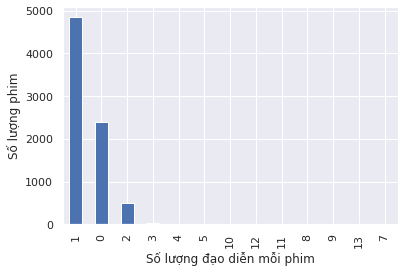

In [43]:
sns.set_theme()

ax = df_movies['director'].apply(lambda x:len(x)).value_counts().plot.bar()
ax.set(ylabel='Số lượng phim', xlabel='Số lượng đạo diễn mỗi phim')

plt.show()

Đa số phim có 1 đạo diễn. Có khá nhiều phim 0 đạo diễn, cũng là giá trị thiếu của cột.

In [44]:
# Đạo diễn tham gia nhiều phim nhất
z=df_movies['director'].sum()
#Lấy top 15
for country,times in Counter(z).most_common(15):
    print("%-20s %4.1d" % (country, times))

Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Youssef Chahine        12
Martin Scorsese        12
Jay Chapman            12
Steven Spielberg       10
Shannon Hartman         9
Anurag Kashyap          9
David Dhawan            9
Kunle Afolayan          8
Justin G. Dyck          8
Umesh Mehra             8


In [45]:
# Tập hợp các đạo diễn tham gia nhiều phim nhất
df_movies['director'].apply(lambda x:str(x)).value_counts()

[]                                      2389
['Raúl Campos', 'Jan Suter']              18
['Marcus Raboy']                          16
['Jay Karas']                             14
['Cathy Garcia-Molina']                   13
                                        ... 
['Alice Wu']                               1
['Claude Barras']                          1
['Prime Cruz']                             1
['Rob Silvestri']                          1
['Bobby Farrelly', 'Peter Farrelly']       1
Name: director, Length: 4050, dtype: int64

Ta thấy Jan Suter và Raúl Campos cùng làm 18 phim. Tuy nhiên tổng thể thì Raúl Campos làm tổng cộng 19 phim còn Jan Suter làm 21 phim. Có thể thấy 2 đạo diễn này đa số là làm chung phim.

Hiện tại không có gì bất thường tại cột đạo diễn ngoài việc dữ liệu thiếu

### Kiểm tra Cast

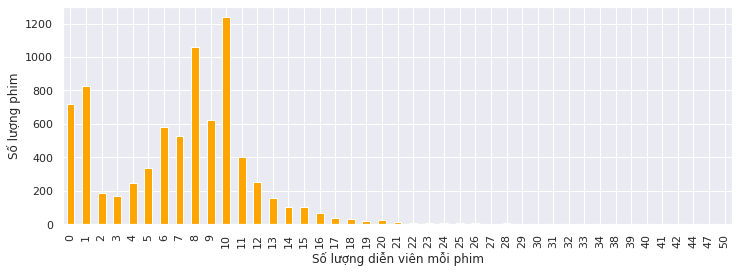

In [46]:
#Đếm số lượng diễn viên
z=df_movies['cast_array'].apply(lambda x:len(x)).value_counts()

ax = z.sort_index().plot.bar(figsize=(12,4),color='orange')

ax.set(ylabel='Số lượng phim', xlabel='Số lượng diễn viên mỗi phim')

plt.show()

### Kiểm tra Country
Xem phân bố dữ liệu theo số nước

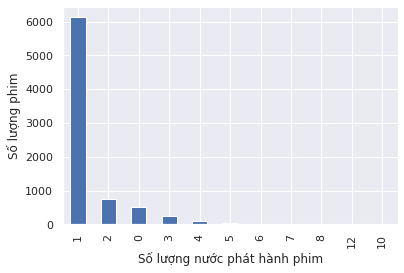

In [47]:
ax = df_movies['country'].apply(lambda x:len(x)).value_counts().plot.bar()

ax.set(ylabel='Số lượng phim', xlabel='Số lượng nước phát hành phim')

plt.show()

Đa số phim được làm bởi 1 nước. Có phim được làm bởi tận 12 nước. Chúng ta xem nước nào làm nhiều phim nhất.

In [48]:
z=df_movies['country'].sum()

#Lấy top 15
for country,times in Counter(z).most_common(15):
    print("%-20s %4.1d" % (country, times))

United States        3297
India                 990
United Kingdom        723
Canada                412
France                349
Japan                 287
Spain                 215
South Korea           212
Germany               199
Mexico                154
China                 147
Australia             144
Egypt                 110
Turkey                108
Hong Kong             102


Mỹ làm nhiều phim nhất sau đó đến Ấn độ,...

### Kiểm tra Season và Min

Phân bố số phút của phim

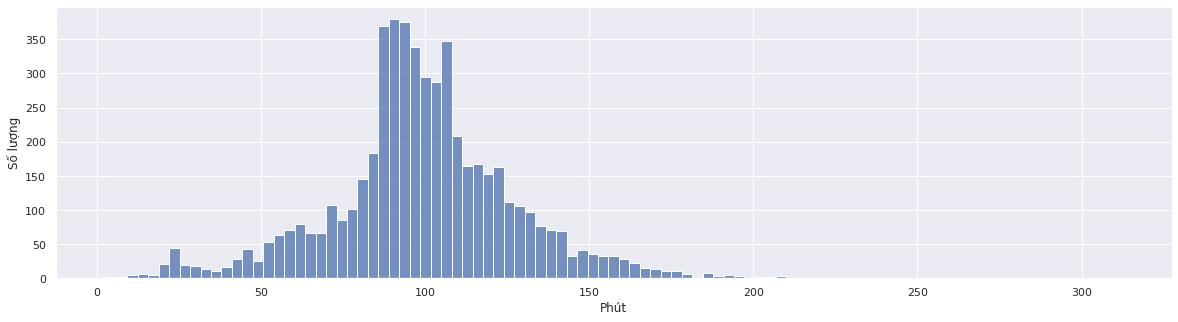

In [49]:
fig, ax = plt.subplots()
fig.set_size_inches(20,5)
sns.histplot(x='min',data=df_movies)
plt.xlabel("Phút")
plt.ylabel("Số lượng")
plt.show()

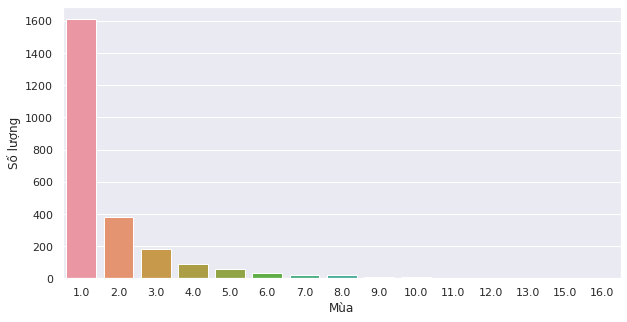

In [50]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.countplot(x='season',data=df_movies)
plt.xlabel("Mùa")
plt.ylabel("Số lượng")
plt.show()

**Nhận xét**
- Hầu hết các phim lẻ đều chọn khoảng thời gian 90 phút.
- Phim ngắn nhất là 3 phút và dài nhất là 312 phút, khá thú vị, ta sẽ xem xem là phim gì.


In [51]:
df_movies['min'].describe()

count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: min, dtype: float64

In [52]:
df_movies['season'].describe()

count    2410.000000
mean        1.775934
std         1.596359
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        16.000000
Name: season, dtype: float64

In [53]:
df_movies[(df_movies['min']==3)|(df_movies['min']==312)][['title','duration','listed_in','country']]

,title,duration,listed_in,country
957,Black Mirror: Bandersnatch,312 min,"Dramas, International Movies, Sci-Fi & Fantasy",[United States]
5605,Silent,3 min,"Children & Family Movies, Sci-Fi & Fantasy",[United States]


**Nhận xét**
* Phim có thời lượng ngắn nhất là 3 phút với 1 phim. Sau khi tìm hiểu thì đây là một bộ phim ngắn.
* Phim có thời lượng dài nhất là 312 phút với 1 phim. Đây là một phim interactive, trong đó người xem có thể tương tác với phim. Thời lượng 312 phút có thể là toàn bộ cảnh phim có thể xảy ra.
* Thời lượng phim trung bình khoảng 100 phút.
* Đối với `TV Show`, số lượng các chương trình có 1 mùa nhiều gấp đôi các mùa khác cộng lại. Để có thể duy trì nhiều mùa có vẻ khó, ta sẽ tìm hiểu `TV show` nào nhiều mùa nhất.

### Kiểm tra Description

In [54]:
## Kiểm tra description
df_movies['description'].describe()

count                                                  7787
unique                                                 7769
top       A surly septuagenarian gets another chance at ...
freq                                                      3
Name: description, dtype: object

Có 7787 description nhưng chỉ có 7769 giá trị khác nhau. Có một nội dung xuất hiện 3 lần. Ta kiểm tra rằng có phải trùng description là trùng tên phim hay không

In [55]:
des_c=df_movies['description'].value_counts()

#desc_list danh sách các description xuất hiện nhiều hơn 1 lần
desc_list=des_c[des_c>1].index.to_list()

In [56]:
#Lấy các dòng có description xuất hiện nhiều hơn 1 lần
df1 = df_movies[df_movies.groupby(['description'])['show_id'].transform('count') > 1][['title_prefix','description']]

#Group ID để tô màu
df1['grpId']=df1.groupby('description').ngroup().add(1)
df1=df1.sort_values(by='grpId')
df1.head()

,title_prefix,description,grpId
7129,Together For Eternity,A scheming matriarch plots to cut off her disa...,1
2860,Hum Saath-Saath Hain,A scheming matriarch plots to cut off her disa...,1
4595,Oh! Baby (Tamil),A surly septuagenarian gets another chance at ...,2
4594,Oh! Baby (Malayalam),A surly septuagenarian gets another chance at ...,2
4593,Oh! Baby,A surly septuagenarian gets another chance at ...,2


In [57]:
def rowStyle(row):
    if row.grpId %2 ==0:
        return ['background-color: #F4ECD6'] * len(row)
    return ['background-color: #A7CAB1'] * len(row)

df1.style.apply(rowStyle,axis=1)

#Tô màu cột index
df1.reset_index().rename(columns={'index': 'Index'}).style\
    .apply(rowStyle, axis=1).hide_index()

Index,title_prefix,description,grpId
7129,Together For Eternity,"A scheming matriarch plots to cut off her disabled stepson and his wife from the family fortune, creating a division within the clan.",1
2860,Hum Saath-Saath Hain,"A scheming matriarch plots to cut off her disabled stepson and his wife from the family fortune, creating a division within the clan.",1
4595,Oh! Baby (Tamil),A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life.,2
4594,Oh! Baby (Malayalam),A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life.,2
4593,Oh! Baby,A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life.,2
5698,Solo,"A young Han Solo tries to settle an old score with the help of his new buddy Chewbacca, a crew of space smugglers and a cunning old friend.",3
5699,Solo,"A young Han Solo tries to settle an old score with the help of his new buddy Chewbacca, a crew of space smugglers and a cunning old friend.",3
525,Angu Vaikuntapurathu (Malayalam),"After growing up enduring criticism from his father, a young man finds his world shaken upon learning he was switched at birth with a millionaire’s son.",4
368,Ala Vaikunthapurramuloo,"After growing up enduring criticism from his father, a young man finds his world shaken upon learning he was switched at birth with a millionaire’s son.",4
4839,Petta (Telugu Version),"An affable, newly appointed college warden proves to be no ordinary man when an old enemy resurfaces and exposes his complicated, violent past.",5


1. Recomendation. Nhập tên phim ra 5 phim giống v. Giống là do: cùng title_prefix, quốc gia, thể loại, lọc text (nâng cao), cùng đạo diễn, cùng diễn viên,...
2. Đạo diễn đóng phim của chính họ?
3. Vẽ biểu đồ miên thể hiện tỷ lệ phim của mỗi nước qua từng năm. Nhận xét với Việt Nam.

# Câu hỏi cần trả lời

## 1. *Với mỗi phim mà người dùng tìm kiếm, ta nên đề xuất thêm (recommend) các phim nào để người dùng xem?*

Việc tìm ra câu trả lời cho câu hỏi này sẽ giúp ích cho cả người dùng và nhà cung cấp dịch vụ xem phim:

- Người dùng: người dùng tìm kiếm một bộ phim để coi, sau khi coi xong có thể họ sẽ muốn coi tiếp những phim có cùng thể loại, cùng diễn viên, cùng quốc gia hay cùng đạo diễn. Sẽ rất tiện cho người dùng nếu hệ thống có thể đề xuất một danh sách phim giống với phim mà người dùng tìm kiếm.
- Nhà cung cấp dịch vụ xem phim: nếu hệ thống đề xuất tốt thì nhiều khả năng người dùng sẽ xem tiếp các bộ phim được đề xuất, thời gian sử dụng dịch vụ lâu hơn, tăng doanh thu nhà cung cấp

Hệ thống recommendation chúng ta xây dựng sẽ là một hệ thống đơn giản, khi người dùng tìm tên phim, thay vì chỉ trả về một bộ phim đó thì chúng ta sẽ trả về các bộ phim tương tự. Độ tương tự của phim sẽ được định nghĩa bằng các yếu tố: `title`, `cast`, `director`, `country`, `rating`, `listed_in`.

Đầu tiên chúng ta thấy rằng nếu người dùng tìm phim Mỹ thì có thể người dùng này thích xem phim Mỹ. Nếu người dùng tìm một bộ phim nào đó thì chúng ta có thể đề nghị thêm những bộ phim có cùng đạo diễn hay cùng diễn viên,... Đây là giả thiết của hệ thống recommendation sẽ xây dựng.

### Chuyển mảng `director`, `cast`, `country`,`listed_in` thành cột tương ứng.
Mỗi đạo diễn, mỗi diễn viên, mỗi quốc gia hay thể loại sẽ là một cột. Phim nào thuộc đạo diễn nào, quốc gia nào, có diễn viên nào sẽ có giá trị là 1 tại cột đó. Điều này sẽ gây bùng nổ số cột dữ liệu nhưng nó giúp ích cho việc tính toán của ta.

Do cột cast quá lớn việc tính toán có thể dẫn đến mất thời gian và không đủ bộ nhớ, nên ta sẽ chỉ lấy cast một vài người đầu. Khá may mắn là có vẻ như Netflix cũng đã sắp xếp cast của mình theo vai, những người đứng đầu sẽ thuộc vai chính trong phim.

In [58]:
#Ta tạo df_rec chỉ dùng cho việc recommend

#Lấy top 3 diễn viên trong mảng diễn viên
df_rec=df_movies.copy()
df_rec['cast_top_3']=df_rec['cast_array'].apply(lambda x:x[:4])

#Drop các cột không cần thiết
df_rec.drop(columns=['cast','cast_array','listed_in','date_added','release_year','duration',
                     'title_postfix','show_id','min','season'],inplace=True)
df_rec.head()

,type,title,director,country,rating,description,title_prefix,listed_in_array,cast_top_3
0,TV Show,3%,[],[Brazil],TV-MA,In a future where the elite inhabit an island ...,3%,"[International TV Shows, Dramas, Sci-Fi & Fant...","[João Miguel, Bianca Comparato, Michel Gomes, ..."
1,Movie,7:19,[Jorge Michel Grau],[Mexico],TV-MA,After a devastating earthquake hits Mexico Cit...,7,"[Dramas, International Movies]","[Demián Bichir, Héctor Bonilla, Oscar Serrano,..."
2,Movie,23:59,[Gilbert Chan],[Singapore],R,"When an army recruit is found dead, his fellow...",23,"[Horror Movies, International Movies]","[Tedd Chan, Stella Chung, Henley Hii, Lawrence..."
3,Movie,9,[Shane Acker],[United States],PG-13,"In a postapocalyptic world, rag-doll robots hi...",9,"[Action & Adventure, Independent Movies, Sci-F...","[Elijah Wood, John C. Reilly, Jennifer Connell..."
4,Movie,21,[Robert Luketic],[United States],PG-13,A brilliant group of students become card-coun...,21,[Dramas],"[Jim Sturgess, Kevin Spacey, Kate Bosworth, Aa..."


In [59]:
df_rec['type']=df_rec['type'].replace({'TV Show':0,'Movie':1})

In [60]:
df_rec=df_rec.join(pd.get_dummies(df_rec['cast_top_3'].apply(pd.Series).stack()).sum(level=0))
df_rec=df_rec.join(pd.get_dummies(df_rec['director'].apply(pd.Series).stack()).sum(level=0),rsuffix="D_")
df_rec=df_rec.join(pd.get_dummies(df_rec['country'].apply(pd.Series).stack()).sum(level=0))
df_rec=df_rec.join(pd.get_dummies(df_rec['listed_in_array'].apply(pd.Series).stack()).sum(level=0))
df_rec=df_rec.join(pd.get_dummies(df_rec['rating'].apply(pd.Series).stack()).sum(level=0))

In [61]:
df_rec.head()

,type,title,director,country,rating,description,title_prefix,listed_in_array,cast_top_3,'Najite Dede,...,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
0,0,3%,[],[Brazil],TV-MA,In a future where the elite inhabit an island ...,3%,"[International TV Shows, Dramas, Sci-Fi & Fant...","[João Miguel, Bianca Comparato, Michel Gomes, ...",0.0,...,0,0,0,0,1,0,0,0,0,0
1,1,7:19,[Jorge Michel Grau],[Mexico],TV-MA,After a devastating earthquake hits Mexico Cit...,7,"[Dramas, International Movies]","[Demián Bichir, Héctor Bonilla, Oscar Serrano,...",0.0,...,0,0,0,0,1,0,0,0,0,0
2,1,23:59,[Gilbert Chan],[Singapore],R,"When an army recruit is found dead, his fellow...",23,"[Horror Movies, International Movies]","[Tedd Chan, Stella Chung, Henley Hii, Lawrence...",0.0,...,0,1,0,0,0,0,0,0,0,0
3,1,9,[Shane Acker],[United States],PG-13,"In a postapocalyptic world, rag-doll robots hi...",9,"[Action & Adventure, Independent Movies, Sci-F...","[Elijah Wood, John C. Reilly, Jennifer Connell...",0.0,...,1,0,0,0,0,0,0,0,0,0
4,1,21,[Robert Luketic],[United States],PG-13,A brilliant group of students become card-coun...,21,[Dramas],"[Jim Sturgess, Kevin Spacey, Kate Bosworth, Aa...",0.0,...,1,0,0,0,0,0,0,0,0,0


In [62]:
#Tiếp tục drop các cột không cần thiết
df_rec.drop(columns=['director','title','country','rating','description','title_prefix','cast_top_3','listed_in_array'],inplace=True)

In [63]:
df_rec.head()

,type,'Najite Dede,4Minute,50 Cent,A. Murat Özgen,A.J. Cook,A.J. LoCascio,A.K. Hangal,A.R. Rahman,A.S. Sasi Kumar,...,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0


Bảng chỉ còn lại các giá trị binary. Việc tính độ tương đồng giữa các phim bây giờ sẽ rất dễ dàng.

In [64]:
#Fill các giá trị thiếu
df_rec=df_rec.fillna(0)

In [65]:
#Lấy value của mảng
v=df_rec.values

In [66]:
def recommend(title):
    
    index=df_rec.index

    #Lọc title
    cond= df_movies['title'] == title

    #Index của phim đã lọc
    i=index[cond].to_list()

    #Các giá trị binary của phim
    value=df_rec[cond].values
    
    if value.shape[0]!=0:
        #Trừ để lấy khoảng cách giữa các phim
        result=np.abs(v-value)

        #Sum khoảng cách
        distance=np.sum(result,axis=1)

        #Điếm số tương đồng tỉ lệ nghịch với khoảng cách. 2 phim càng gần thì độ tương đồng càng cao.
        score=1/(distance+1)

        d=dict(Counter(score))

        #Dataframe để thim các phim chúng ta recommend
        df_sim=df_movies[['type','title','director','cast','country','rating','listed_in','description']].copy()
        df_sim['sim_score']=score

        #Sort theo sim_score
        df_sim=df_sim.sort_values(by='sim_score',ascending=False)

        # Ở đây chúng ta sẽ lấy [1:6]. Vì sim_score cao nhất = 1 sẽ chính là phim đang xét. 
        # Tuy nhiên để có thể xem được phim mình đang xét là phim gì thì chúng ta sẽ lấy luôn dòng này
        df_sim=df_sim.iloc[0:6] #Xem luôn phim mình đang xét
        #df_sim=df_sim.iloc[1:6] #Chỉ xem nhưng phim được recommend
        return df_sim
    print('Tên phim không tồn tại. Vui lòng chọn phim khác')

In [67]:
recommend("Money Heist")

Tên phim không tồn tại. Vui lòng chọn phim khác


In [68]:
recommend("The Conjuring")

,type,title,director,cast,country,rating,listed_in,description,sim_score
6242,Movie,The Conjuring,[James Wan],"Vera Farmiga, Patrick Wilson, Lili Taylor, Ron...",[United States],R,"Horror Movies, Thrillers","Based on true events, this spine-chiller tells...",1.000000
1542,Movie,Crip Camp: A Disability Revolution,[],NaN,[United States],R,Documentaries,A groundbreaking summer camp galvanizes a grou...,0.111111
1530,Movie,Creep,[Patrick Brice],"Mark Duplass, Patrick Brice",[United States],R,"Horror Movies, Independent Movies, Thrillers",When a cash-strapped videographer takes a job ...,0.100000
6860,Movie,The Seven Five,[Tiller Russell],NaN,[United States],R,Documentaries,This riveting film examines the case of Mike D...,0.100000
4688,Movie,Otherhood,[],NaN,"[United Kingdom, United States]",R,Comedies,"Feeling forgotten on Mother's Day, three best ...",0.100000
190,Movie,A Kind of Murder,[Andy Goddard],"Patrick Wilson, Jessica Biel, Vincent Kartheis...",[United States],R,Thrillers,"Obsessed with an unsolved murder case, a crime...",0.100000


The Conjuring là phim kinh dị, có rating R, của Mỹ, thể loại là Horror, Thrillers. Sau khi tìm kiếm ta thấy hệ thống recommend những phim cũng rating R, một số phim có cùng thể loại và các phim đều ở Mỹ.

In [69]:
recommend("Breaking Bad")

,type,title,director,cast,country,rating,listed_in,description,sim_score
1089,TV Show,Breaking Bad,[],"Bryan Cranston, Aaron Paul, Anna Gunn, Dean No...",[United States],TV-MA,"Crime TV Shows, TV Dramas, TV Thrillers",A high school chemistry teacher dying of cance...,1.000000
1945,Movie,El Camino: A Breaking Bad Movie,[Vince Gilligan],Aaron Paul,[United States],TV-MA,"Dramas, Thrillers",Fugitive Jesse Pinkman attempts to outrun his ...,0.142857
7219,TV Show,Trial By Media,[],NaN,[United States],TV-MA,"Crime TV Shows, Docuseries","In this true crime docuseries, some of the mos...",0.125000
4403,TV Show,Narcoworld: Dope Stories,[],NaN,[United States],TV-MA,"Crime TV Shows, Docuseries",Ride along as police officers and drug smuggle...,0.125000
1491,TV Show,Conversations with a Killer: The Ted Bundy Tapes,[],NaN,[United States],TV-MA,"Crime TV Shows, Docuseries","Present-day interviews, archival footage and a...",0.125000
4292,TV Show,Murderous Affairs,[],NaN,[United States],TV-MA,"Crime TV Shows, Docuseries","Mixing interviews with dramatic re-enactments,...",0.125000


Người dùng tìm Breaking Bad sẽ được recommend các Crime TV Shows ở Mỹ khác. Vì Breaking Bad là một TV show về tội phạm nên có khả năng cao người dùng sẽ xem tiếp những TV show tội phạm khác.

In [70]:
recommend("Laatu")

,type,title,director,cast,country,rating,listed_in,description,sim_score
3508,Movie,Laatu,[Manav Shah],"Gagan Kokri, Aditi Sharma, Karamjit Anmol, Sar...",[India],TV-PG,"Comedies, Dramas, International Movies",A man who hopes to bring light to his village ...,1.000000
5399,Movie,Sat Shri Akaal England,[Vikram Pradhan],"Ammy Virk, Monica Gill, Karamjit Anmol, Sardar...",[India],TV-14,"Comedies, Dramas, International Movies",After several failed attempts to obtain a visa...,0.111111
3232,Movie,Judge Singh LLB,[Atharv Baluja],"Ravinder Grewal, B.N. Sharma, Sardar Sohi, Cha...",[India],TV-PG,"Comedies, Dramas, International Movies","Framed by a politician for committing murder, ...",0.111111
1259,Movie,Chadi Jawani Budhe Nu,[],Anand,[India],TV-PG,"Comedies, International Movies, Romantic Movies","After reaching his 40th birthday, an egotistic...",0.111111
311,Movie,Adhugo,[],NaN,[India],TV-14,"Comedies, International Movies, Thrillers",A fast-footed piglet named Bunty becomes an ob...,0.100000
484,Movie,An American in Madras,[Karan Bali],NaN,[India],TV-PG,"Documentaries, International Movies",Extensive film clips and interviews tell the s...,0.100000


Khi tìm một phim ở Ấn Độ thì hệ thống sẽ recommend hàng loạt phim Ấn Độ cùng thể loại khác.

In [71]:
recommend("Destiny")

,type,title,director,cast,country,rating,listed_in,description,sim_score
1719,Movie,Destiny,[Youssef Chahine],"Nour El-Sherif, Laila Elwi, Mahmoud Hemeida, S...","[France, Egypt]",TV-14,"Dramas, International Movies","In 12th-century Spain, a philosopher and his p...",1.000000
6327,Movie,The Emigrant,[Youssef Chahine],"Khaled El Nabawy, Hanan Turk, Yousra, Mahmoud ...","[Egypt, France]",TV-14,"Dramas, International Movies",Ram leaves the nomadic life and embarks on a q...,0.142857
5511,Movie,Seven (Telugu),[],NaN,[],TV-14,"Dramas, International Movies, Romantic Movies",Multiple women report their husbands as missin...,0.111111
1230,Movie,Casablancas: The Man Who Loved Women,[Hubert Woroniecki],NaN,[France],TV-14,"Documentaries, International Movies",The rise and smash success of Elite modeling a...,0.100000
2760,Movie,Hitler's Steel Beast,[Daniel Ablin],NaN,[France],TV-14,"Documentaries, International Movies",Trace the history of Hitler's armored private ...,0.100000
5723,Movie,Sorry To Disturb,[Khaled Marei],"Ahmed Helmy, Mahmoud Hemeida, Menna Shalaby, D...",[Egypt],TV-14,"Dramas, International Movies","After losing his father, a genius yet troubled...",0.100000


Đây là trường hợp khi một director làm nhiều phim thì hệ thống sẽ recommend các phim khác của director đó.

## 2. *Đạo diễn nào đóng phim của chính họ? Qua đó nhận xét tỷ lệ giữa TV Show và Movie mà đạo diễn đó thực hiện và top 10 đạo diễn nhưng có khả năng diễn xuất cùng số lượng mỗi loại chương trình họ thực hiện.*

**Ý nghĩa:**
- Việc tìm ra câu trả lời cho câu hỏi này sẽ giúp ta có nhận thức về việc diễn viên trở thành đạo diễn như trường hợp của Ngô Thanh Vân hay Trấn Thành hay Lý Tiểu Long có phổ biến hay không.
- Với việc lọc ra top 10, ta cần biết liệu những diễn viên đứng đầu có thể tiếp tục sản xuất những bộ phim mình đạo diễn hay sẽ nhanh chóng gặp trở ngại vì quá nhiều công việc.

**Quy trình**
- Vì quá trình tiền xử lý nhóm đã làm khá kĩ, nên chúng ta có thể tiếp tục phân tích mà không cần tiền xử lý.
- Tìm xem liệu có tồn tại những phim mà có đạo diễn cũng chính là diễn viên trong phim đó.
- Nếu bước trên tồn tại, ta cần tìm hiểu xem là thể loại nào chiếm ưu thế? Movie hay TV Shows. Mục đích là để hiểu thêm rằng những đạo diễn - diễn viễn đó sẽ chọn những thể loại nào để sản xuất. 
- Lọc ra top 10 đạo diễn - diễn viên cùng với thể loại họ thường có xu hướng đạo diễn.

In [72]:
# Lấy danh sách những đạo diễn có tham gia diễn xuất trong phim của mình.
bool_has_director_act = df_movies.loc[:,['director','cast_array']]\
         .apply(lambda x: any(director in x.loc['cast_array'] for director in x.loc['director']) \
                if len(x.loc['director']) > 0 else False,axis=1)

print(f"Tồn tại {np.sum(bool_has_director_act)} phim là có đạo diễn cũng đóng 1 trong các vai chính của bộ phim đó.")
print("Vài ví dụ về những phim đó gồm:")
list_df = df_movies.loc[bool_has_director_act,
              ['type', 'title', 'director', 'country','title_postfix', 'title_prefix', 'cast_array', 'min', 'season','listed_in_array']]
list_df.sample(10)

Tồn tại 308 phim là có đạo diễn cũng đóng 1 trong các vai chính của bộ phim đó.
Vài ví dụ về những phim đó gồm:


,type,title,director,country,title_postfix,title_prefix,cast_array,min,season,listed_in_array
337,TV Show,Age of Rebellion,[Peter Ho],[Taiwan],NaN,Age of Rebellion,"[Peter Ho, Jeanine Yang, Tammy Chen, Jason Tso...",NaN,1.0,"[Crime TV Shows, International TV Shows, Dramas]"
594,Movie,Asees,[Rana Ranbir],[India],NaN,Asees,"[Rana Ranbir, Neha Pawar, Kuljinder Sidhu, Rup...",123.0,NaN,"[Dramas, International Movies, Music & Musicals]"
3230,Movie,Judah Friedlander: America Is the Greatest Cou...,[Judah Friedlander],[United States],America Is the Greatest Country in the United...,Judah Friedlander,[Judah Friedlander],84.0,NaN,[Stand-Up Comedy]
3599,Movie,Lens,[Jayaprakash Radhakrishnan],[India],NaN,Lens,"[Jayaprakash Radhakrishnan, Anand Sami, Aswath...",109.0,NaN,"[Dramas, Independent Movies, International Mov..."
5245,Movie,Rocky Handsome,[Nishikant Kamat],[India],NaN,Rocky Handsome,"[John Abraham, Diya Chalwad, Shruti Haasan, Ni...",119.0,NaN,"[Action & Adventure, International Movies]"
3651,Movie,Lionheart,[Genevieve Nnaji],[Nigeria],NaN,Lionheart,"[Genevieve Nnaji, Nkem Owoh, Pete Edochie, Ony...",95.0,NaN,"[Comedies, Dramas, Independent Movies]"
6487,Movie,The Incredibles 2,[Brad Bird],[United States],NaN,The Incredibles 2,"[Craig T. Nelson, Holly Hunter, Samuel L. Jack...",118.0,NaN,"[Children & Family Movies, Comedies]"
3260,Movie,Justine,[Stephanie Turner],[United States],NaN,Justine,"[Stephanie Turner, Glynn Turman, Daisy Prescot...",106.0,NaN,"[Dramas, Independent Movies]"
5376,Movie,Sangam,[Raj Kapoor],[India],NaN,Sangam,"[Raj Kapoor, Vyjayanthimala, Rajendra Kumar, L...",228.0,NaN,"[Classic Movies, Dramas, International Movies]"
4675,Movie,Opium and the Kung Fu Master,[Chia Tang],[Hong Kong],NaN,Opium and the Kung Fu Master,"[Lung Ti, Te-Lo Mai, Leanne Liu, Kuan Tai Chen...",86.0,NaN,"[Action & Adventure, International Movies]"


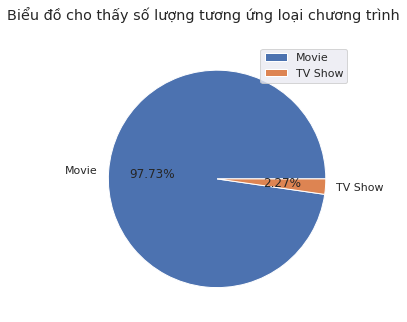

In [73]:
# Kiểm tra loại phim nào mà đạo diễn có tham gia diễn xuất nhiều hơn
all_type_df = pd.DataFrame(list_df['type'].value_counts())
ax = all_type_df.plot(kind='pie', legend=True, title='Biểu đồ cho thấy số lượng tương ứng loại chương trình', 
                     subplots=True,autopct='%1.2f%%', figsize=(15,5), ylabel='')

plt.show()

*Nhận xét:*
- Vậy phần lớn đạo diễn thích chỉ đạo và diễn những phim lẻ hơn là những phim bộ.

In [74]:
# Lấy danh sách những đạo diễn - diễn viên top đầu
list_director, count_director = np.unique(np.sum(list_df['director']),return_counts=True)

director_df = pd.DataFrame(data=list(zip(list_director, count_director)),columns=['Name','Count'])\
                .sort_values(by=['Count'], ascending=False)\
                .drop(columns=['Count'])

number_director_cast = len(list_director)
number_all_director = len(np.unique(df_movies.loc[:,'director'].sum()))
print(f"Có {number_director_cast} đạo diễn trên {number_all_director} đạo diễn là có tham gia đóng phim của chính họ,\
tương đương với tỷ lệ {np.round(number_director_cast / number_all_director,decimals=2)*100}%")

top_10_director = director_df.head(10)

print(f'\nTop 10 đạo diễn có tham gia đóng phim của chính họ')
top_10_director

Có 331 đạo diễn trên 4478 đạo diễn là có tham gia đóng phim của chính họ,tương đương với tỷ lệ 7.000000000000001%

Top 10 đạo diễn có tham gia đóng phim của chính họ


,Name
326,Yılmaz Erdoğan
223,Omoni Oboli
147,John Paul Tremblay
201,Mike Smith
257,Robb Wells
255,Ricky Gervais
297,Sylvester Stallone
178,Louis C.K.
217,Note Chern-Yim
250,Rano Karno


In [75]:
# Xem những đạo diễn - diễn viên top đầu đóng thiên về loại phim gì
def f_director_cast_unique(x):
    list_director, count_director = np.unique(np.sum(x.loc[:,'director']),return_counts=True)
    
    director_by_type_df = pd.DataFrame(data=list(zip(list_director, count_director)),columns=['Director','Count'])\
                           .sort_values(by=['Count'], ascending=False)\
                           .set_index('Director')
    
    return director_by_type_df

list_director_cast_group = list_df.groupby(by=['type']).apply(lambda x: f_director_cast_unique(x)).unstack(0)

list_director_cast_group.columns = list_director_cast_group.columns.get_level_values(1)

list_director_cast_group = list_director_cast_group.fillna(value=0).astype(np.int32)

list_director_cast_group = list_director_cast_group.loc[top_10_director['Name'],:]

list_director_cast_group

type,Movie,TV Show
Director,,
Yılmaz Erdoğan,7,0
Omoni Oboli,6,0
John Paul Tremblay,4,1
Mike Smith,4,1
Robb Wells,4,1
Ricky Gervais,3,0
Sylvester Stallone,3,0
Louis C.K.,3,0
Note Chern-Yim,3,0


**Nhận xét**
- Có những đạo diễn diễn cả phim lẻ lẫn phim bộ, nhưng họ vẫn thực hiện số phim lẻ nhiều hơn, có lẽ vì việc chiếu rạp sẽ có doanh thu nhiều hơn.
- Những đạo diễn trên phần lớn thuộc về các nước Mỹ, Canada, Anh, Indonesia, Thái Lan; mặc dù theo khám phá dữ liệu ở trên, số lượng phim của Mỹ và Ấn Độ là chiếm hơn 60% nhưng số người vừa đạo diễn vừa là diễn viên là khá ít. Như vậy, khi ta tập trung một một công việc, tỷ lệ thành công của công việc đó sẽ cao hơn rất nhiều so với cùng làm nhiều công việc cùng lúc (93% so với 7%). 
- Có 331 đạo diễn có đóng phim của mình nhưng lại có 308 phim, do đó, có những phim có ít nhất 2 đạo diễn là diễn viên.
- 7% không phải là con số thể hiện việc hiếm xảy ra, do đó, có khả năng là tỷ lệ số diễn viên tự sản xuất bộ phim cho chính mình đang dần được hình thành mạnh lên.

## 3. *Vẽ biểu đồ miền thể hiện tỷ lệ phim của 10 nước (có tổng số phim nhiều nhất ở Netflix) qua từng năm. Đồng thời đánh giá sự phát triển về số lượng phim được đánh giá cao qua từng năm của các quốc gia đó. Cho biết Việt Nam có phù hợp tình hình chung đó không?*

**Ý nghĩa:**
- Việc tìm ra câu trả lời cho câu hỏi này sẽ giúp ta có cái nhìn tổng quan về tình hình các nước trên thế giới và phán đoán khả năng phát triển của Việt Nam:
>*Thế giới*: Mặc dù 10 nước trên có số lượng phim trên Netflix rất cao, và ta sẽ cần xem xét môi trường cạnh tranh khốc liệt như thế nào.  
>*Việt Nam*: Kiểm tra xem Viêt Nam so với thế giới như thế nào, hiểu được việc phim Việt Nam khi ra môi trường thế giới sẽ đối mặt với những vấn đề gì.
- Liệu dịch COVID-19 có ảnh hưởng gì tới các nước trong việc sản xuất phim và chương trình mới.
- Với việc phân tích này, chúng ta cũng phần nào nắm bắt được thị trường mà Netfix trong những năm trước 2021 tập trung vào.

**Quy trình:**
- Đầu tiên ta sẽ lọc ra nước có tổng số phim trên Netflix nhiều nhất rồi từ đó vẽ biểu đồ miền và biểu đồ đường để hiểu rõ mức chênh lệch về tổng số phim để xem tình hình giữa các nước có cạnh tranh như thế nào và Netflix đang chuyển thêm thị trường nào.
- Sau đó mới tiến hành xem xét tình hình sản xuất phim được đánh giá cao ở Việt Nam.

- *Trong bước này ta sẽ tìm ra 10 nước có tổng số lượng phim nhiều nhất ở Netflix*

In [76]:
# Loại bỏ những phim hay chương trình không rõ được quay ở nước nào
is_not_nan_list_country = df_movies['country'].apply(lambda x: True if x != ['nan'] else False)

# Liệt kê danh sách các nước đồng thời đếm số lần nước đó có cung cấp cảnh diễn
list_country, count_country = np.unique(np.sum(df_movies.loc[is_not_nan_list_country,'country']),return_counts=True)

country_df = pd.DataFrame(data=list(zip(list_country, count_country)),columns=['Country','Count'])\
                .sort_values(by=['Count'], ascending=False)\
                .drop(columns=['Count'])

# Lọc ra 10 nước có tổng số phim nhiều nhất
top_10_country = country_df.loc[:,'Country'].head(10)

top_10_country

111     United States
43              India
110    United Kingdom
19             Canada
34             France
51              Japan
98              Spain
96        South Korea
36            Germany
65             Mexico
Name: Country, dtype: object

- *Chuyển danh sách về bảng theo từng năm và theo từng nước*

In [77]:
# Ta cần thêm một cột được rút từ cột `date_added` của dữ liệu
netflix_df_all = df_movies.loc[:,['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added','release_year']].copy()
netflix_df_all['year_added'] = netflix_df_all.loc[:,'date_added'].dt.year

# Hàm Lấy danh sách và số lượng theo từng nước với mỗi group
def DF_unique(x):
    list_country, count_country = np.unique(np.sum(x.loc[:,'country']),return_counts=True)
    
    country_by_year_df = pd.DataFrame(data=list(zip(list_country, count_country)),columns=['Country','Count'])\
                           .sort_values(by=['Count'], ascending=False)\
                           .set_index('Country')
    
    return country_by_year_df

# Chuyển dữ liệu thành bảng bằng cách group theo năm
netflix_df_all = netflix_df_all.groupby(['year_added']).apply(lambda x: DF_unique(x)).unstack(1)

netflix_df_all.columns = netflix_df_all.columns.get_level_values(1)

netflix_df_all = netflix_df_all.fillna(value=0).astype(np.int32)

netflix_df = netflix_df_all.loc[:,top_10_country]

netflix_df

Country,United States,India,United Kingdom,Canada,France,Japan,Spain,South Korea,Germany,Mexico
year_added,,,,,,,,,,
2004,2,0,0,0,0,0,0,0,0,0
2008,2,0,0,0,0,0,0,0,0,0
2009,1,0,0,0,0,1,0,0,0,0
2010,1,0,0,0,0,0,0,0,0,0
2011,12,0,0,0,1,0,1,0,0,1
2012,3,0,0,0,0,0,0,0,0,1
2013,11,0,1,1,0,0,0,0,0,0
2014,23,0,4,4,0,0,0,0,0,0
2015,60,0,8,8,9,1,0,0,2,1


- *Ta sẽ vẽ biểu đồ miền theo từng năm, do đó ta sẽ đưa chúng về tỷ lệ phần trăm theo từng năm ứng với số lượng phim mỗi nước*

In [78]:
data_perc = netflix_df.divide(netflix_df.sum(axis=1), axis=0)
data_perc

Country,United States,India,United Kingdom,Canada,France,Japan,Spain,South Korea,Germany,Mexico
year_added,,,,,,,,,,
2004,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2009,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
2010,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011,0.800000,0.000000,0.000000,0.000000,0.066667,0.000000,0.066667,0.000000,0.000000,0.066667
2012,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000
2013,0.846154,0.000000,0.076923,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014,0.741935,0.000000,0.129032,0.129032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015,0.674157,0.000000,0.089888,0.089888,0.101124,0.011236,0.000000,0.000000,0.022472,0.011236


- *Thể hiện dữ liệu trên biểu đồ miền*

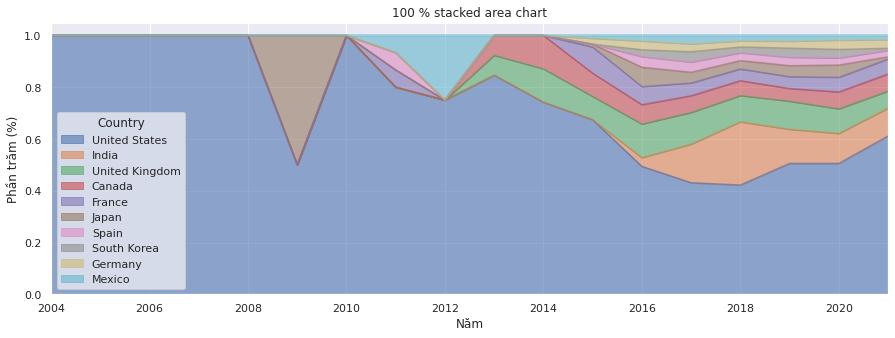

In [79]:
sns.set_theme()

ax = data_perc.plot(kind='area', stacked=True, title='100 % stacked area chart', 
                    figsize=(15,5), alpha=0.6, sharex=True )

ax.set_ylabel('Phần trăm (%)')
ax.set_xlabel('Năm')
ax.margins(0, 0)

plt.show()


**Nhận xét**
- Mỹ là nước có số lượng phim được đưa vào Netfix cao hơn rất nhiều so với những nước khác qua các năm.
- Trải qua 13 năm, thị trường Châu Âu và Châu Á bắt đầu lấn chiếm thị trường Mỹ. Có vẻ từ năm 2015, Netflix đã thấy tiềm năng ở các thị trường ở các châu lục này. Tuy nhiên khá khó hiểu rằng với dân số 1 tỷ dân của Trung Quốc lại không nằm trong top 10, phải chăng vì chính sách của Donald Trump đối với Trung Quốc đã hạn chế ông lớn này đến thị trường tỷ dân?
- Năm 2020 là năm đánh dấu số lượng phim giảm rõ rệt, có thể là do dịch COVID-19 đã ảnh hưởng rất lớn đến hoạt động tập thể ở 2 châu lục này hoặc Netflix bị ảnh hưởng bởi dịch do đó đã bị hạn chế về nhân lực và họ lại tập trung hơn vào thị trường Mỹ.

**Tiếp tục phân tích**
- *Để làm rõ sự phát triển về `nghệ thuật thứ 7` của những nước top đầu, ta sẽ tiếp tục tiến hành phân tích tiến trình phát triển mỗi nước*

In [80]:
# Từ bảng các giá trị, ta chuyển về dạng DataFrame để vẽ biểu đồ
netflix_df_stacked = pd.DataFrame(netflix_df.stack(0)).reset_index()
netflix_df_stacked.columns = ['Year','Country','Films']
netflix_df_stacked

,Year,Country,Films
0,2004,United States,2
1,2004,India,0
2,2004,United Kingdom,0
3,2004,Canada,0
4,2004,France,0
...,...,...,...
145,2021,Japan,1
146,2021,Spain,3
147,2021,South Korea,1
148,2021,Germany,4


KeyError: "None of [Index(['Năm', 'Số lượng phim'], dtype='object')] are in the [columns]"

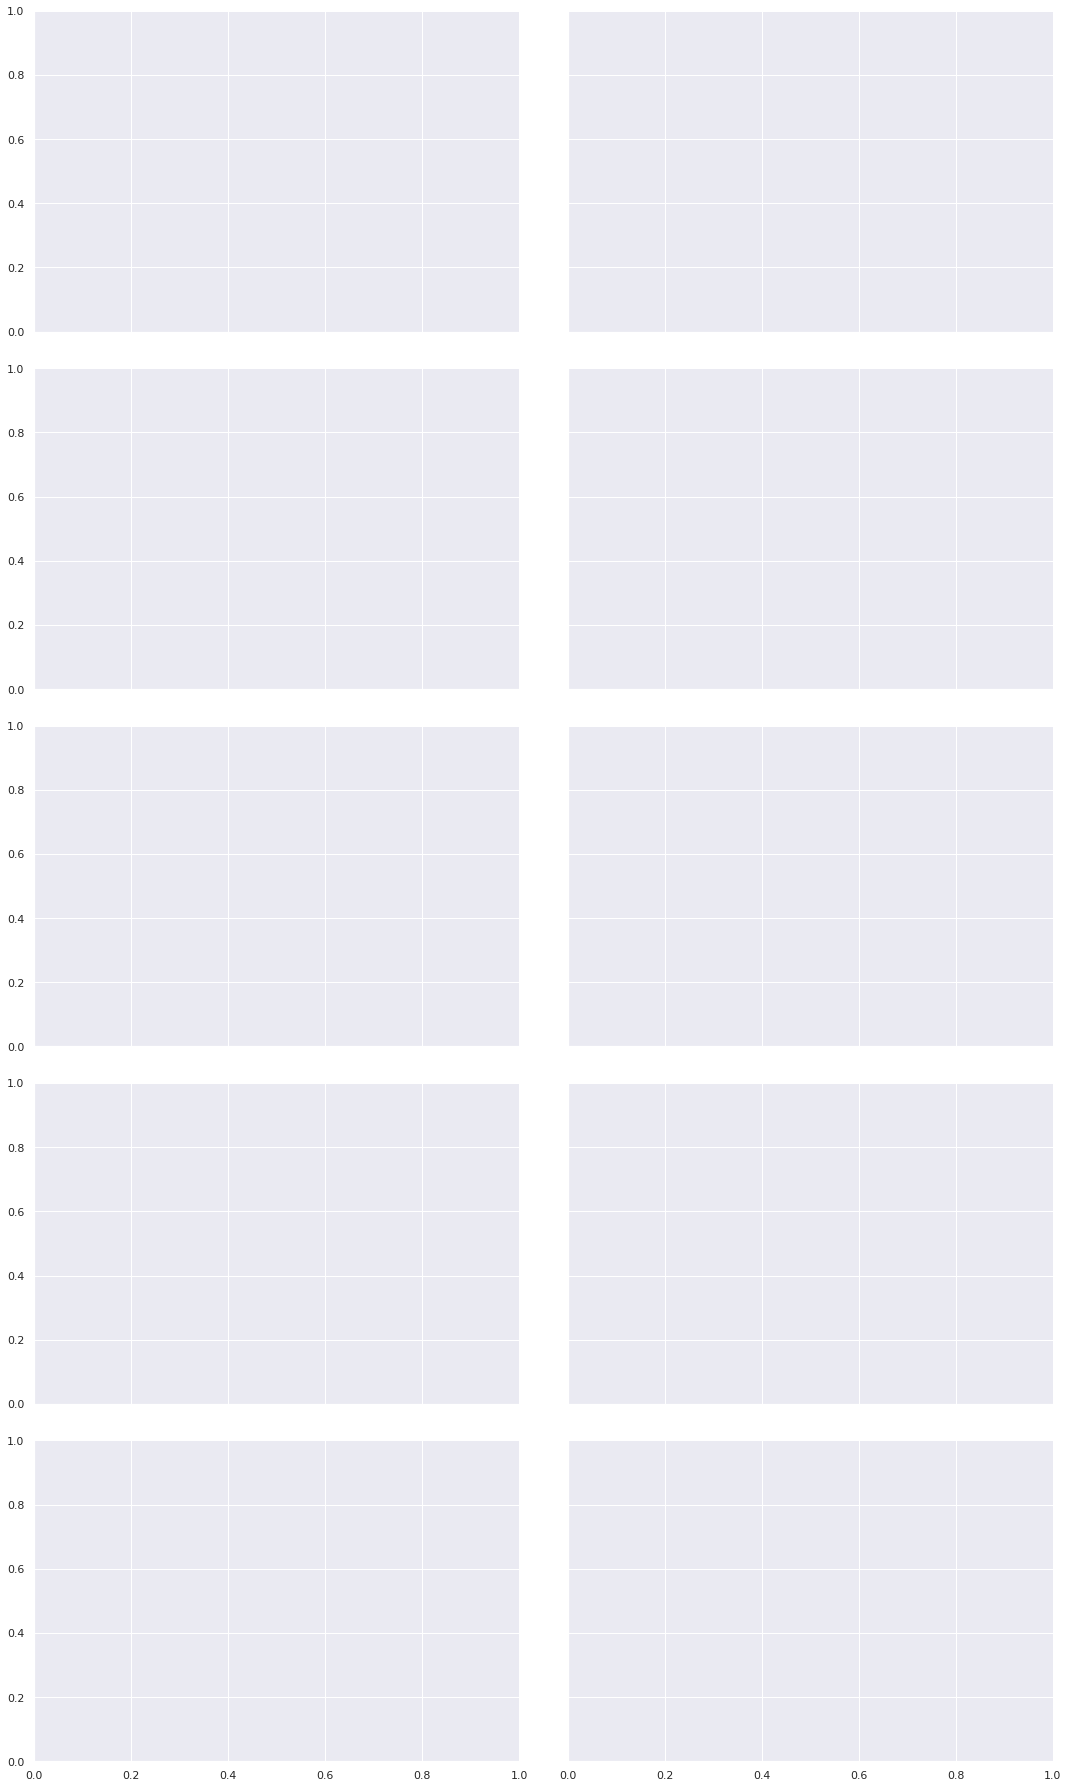

In [81]:
# Khởi tạo grid
g = sns.FacetGrid(netflix_df_stacked, col='Country', hue='Country', 
                  col_wrap=2, height=5, aspect=1.5)

# Vẽ biểu đồ đường
g = g.map(plt.plot, 'Năm', 'Số lượng phim')

# Tô màu các biểu đồ
g = g.map(plt.fill_between, 'Year', 'Films', alpha=0.4)
 
# Hiệu chỉnh tên từng biểu đồ
g = g.set_titles("{col_name}")
 
# Thêm tên tổng của các biểu đồ
plt.subplots_adjust(top=0.94)
g = g.fig.suptitle('Sự phát triển về số lượng phim được đưa vào Netflix qua từng năm của các quốc gia top 10')

# Vẽ grid 
plt.show()

# code được tham khảo từ: https://www.python-graph-gallery.com/242-area-chart-and-faceting

**Nhận Xét:**
- Trừ năm cuối cùng do dữ liệu bị nhật thiếu, thì 9/10 nước (trừ Canada) đều có xu hướng tăng số lượng phim được thêm vào Netflix.
- Năm 2020 là năm khiến nhiều nước lớn giảm sản xuất các phim và chương trình đủ chất lượng.
- Nơi đặt trụ sở Netflix vẫn là nơi dẫn đầu về tình hình phát triển, tuy nhiên cũng có thể thấy Netflix đang vươn cánh tay ra nhiều nước khác. 

**Kiểm tra tình hình Việt Nam:**
- Việt Nam trong thời gian qua thì mảng phim hoạt động khá nhộn nhịp, tuy nhiên, để được đánh giá cao trên Netflix thì không phải là chuyện dễ, mục tiêu phần này là muốn xem xem tình hình phát triển của Việt Nam, liệu trong tương lai, Việt Nam có thể phát triển mạnh ở môn nghệ thuật thứ 7 này không.

In [ ]:
# Kiểm tra tình hình phát triển qua các năm
vietnam_df = netflix_df_all.loc[:,['Vietnam']]

sns.set_theme(style="darkgrid")

ax = sns.lineplot(data=vietnam_df, x='year_added', y='Vietnam', legend=True)

plt.fill_between(x=vietnam_df.index, y1=vietnam_df.Vietnam.values, alpha=0.4)

ax.set(xlabel='Năm', ylabel='Số lượng phim')

plt.show()


In [ ]:
# Các phim được thêm vào Netflix
df_movies.loc[df_movies.loc[:,'country'].apply(lambda x: 'Vietnam' in x),
              ['title', 'director', 'cast', 'country', 'date_added', 
                 'release_year', 'duration', 'listed_in', 'description',]]\
        .sort_values(by='release_year')

**Nhận xét**
- Vậy biểu đồ tăng trưởng Việt Nam tương tự như phần đông của thế giới khi phim được thêm vào năm 2017-2019 là nhiều, có thể những năm này, Netflix đánh vào thị trường Việt Nam, nhưng có vẻ số lượng phim chất lượng là khá thấp.
- Số lượng phim Việt Nam ra môi trường ngoài nước là rất ít so với các nước khác, tuy nhiên việc nằm trong danh sách số ít nước có phim và chương trình ở Netflix cũng cho thấy khả năng của người Việt như thế nào, có thể trong tương lai sẽ có nhiều nội dung ấn tượng để đưa Việt Nam phát triển mạnh hơn.
- Tình hình chung là năm 2019-2020 có vẻ như hầu hết các nước đều có biểu đồ đi xuống hoặc ngưng lại, có lẻ là do đại dịch COVID-19 làm xáo trộn tình hình tạo ra phim mới.
- Thị trường Việt Nam cũng được xem là thị trường tiềm năng, có lẻ là lối sống dân ta khá "nhàn"?

# Nhìn lại quá trình làm đồ án

## Trần Thanh Phúc
**Những khó khăn:**
* Tìm ra được câu hỏi có ý nghĩa cần trả lời cũng là một điểm khá khó với bộ dữ liệu này.
* Merge thủ công bằng tay, phải copy qua lại giữa các notebook khá nhiều. Chưa có cách merge tự động.
* Nhiều vấn đề về xử lý và tràn bộ nhớ trong hệ thống recommend.

**Những gì học được:**
* Xử lý dữ liệu kiểu mảng trong pandas.
* Tô màu dataframe.
* Thành thạo hơn khi sử dụng `pandas.Series.apply()`
* Học được thêm về hệ thống recommend.
* Tìm kiếm bất thương trong dữ liệu.

## Nguyễn Điền Thanh Phong
**Những khó khăn:**
* Chọn câu hỏi có ý nghĩa được phân tích từ dữ liệu này.
* Tìm loại đồ thị nào để thể hiện dữ liệu đó cũng như xây dựng `pandas.DataFrame` để cung cấp cho hàm vẽ.
* Bung từ danh sách bên trong từng `cell` của mỗi cột ra một bảng dữ liệu lớn hơn rồi sau đó tạo bảng giá trị từ những Cell bung ra đó. 

**Những gì học được:**
* Xử lý dữ liệu kiểu mảng trong pandas.
* Biết thêm về các thư viện thực hiện việc trực quan hóa dữ liệu cũng như cách sử dụng chúng.
* Học cách tìm hiểu và lọc các tiềm năng của dữ liệu.
* Thành thạo hơn khi sử dụng `pandas.Series.apply()`, `pandas.Series.agg()`, `lambda`
* Xử lý tạo bảng dữ liệu (stack,...)

## Nhóm

**Nếu có thêm thời gian, nhóm sẽ:**
* Cải thiện thêm hệ thống recommend.
* Khám phá thêm các insight khác.
* Phân tích các đồ thị kỹ càng hơn.

# Tài liệu tham khảo

1. Tài liệu các thư viện về việc trực quan hóa: [python-graph-gallery](https://www.python-graph-gallery.com/)
2. [Document của Pandas](https://pandas.pydata.org/docs/)
3. Tham khảo xây dựng hệ thống recommend: https://www.kaggle.com/shivamb/netflix-shows/tasks?taskId=2447